<a href="https://colab.research.google.com/github/palodavis/IA_regressao/blob/main/Atividade1_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tratamento dos dados


In [ ]:
#Bib para visualização de dados dinâmicos
#!pip install plotly --upgrade
#!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Carregar os dados
df = pd.read_csv('ford.csv')
print(df.shape)
df.head()

(17965, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [ ]:
#Checar os valores nulos
df.isna().sum()

model           1
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# informações básicas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.864069,12279.856833,23360.858447,113.324353,57.907821,1.350804
std,2.024978,4741.279186,19471.182902,62.010410,10.125350,0.432379
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31048.000000,145.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [ ]:
df["Ano atual"]=2023
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Ano atual
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,2023
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,2023
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,2023
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,2023
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,2023


In [ ]:
#Descobrir a idade do carro
df["Age"]=df["Ano atual"]-df["year"]
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Ano atual,Age
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,2023,6
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,2023,5
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,2023,6
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,2023,4
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,2023,4


In [ ]:
# Remover a coluna Ano e Ano atual
df.drop(["year"],axis=1,inplace=True)
df.drop(["Ano atual"],axis=1,inplace=True)
df.head(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Age
0,Fiesta,12000,Automatic,15944,Petrol,150,57.7,1.0,6
1,Focus,14000,Manual,9083,Petrol,150,57.7,1.0,5
2,Focus,13000,Manual,12456,Petrol,150,57.7,1.0,6
3,Fiesta,17500,Manual,10460,Petrol,145,40.3,1.5,4
4,Fiesta,16500,Automatic,1482,Petrol,145,48.7,1.0,4
5,Fiesta,10500,Manual,35432,Petrol,145,47.9,1.6,8
6,Puma,22500,Manual,2029,Petrol,145,50.4,1.0,4
7,Fiesta,9000,Manual,13054,Petrol,145,54.3,1.2,6
8,Kuga,25500,Automatic,6894,Diesel,145,42.2,2.0,4
9,Focus,10000,Manual,48141,Petrol,145,61.4,1.0,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Selecionar as colunas categóricas
categorical_columns = ["model", "transmission", "fuelType"]

# Criar um codificador one-hot
encoder = OneHotEncoder(sparse=False, drop="first")  # drop="first" para evitar a multicolinearidade

In [ ]:
# Ajustar e transformar as colunas categóricas
encoded_columns = encoder.fit_transform(df[categorical_columns])

# Obter os nomes das colunas codificadas
encoded_column_names = encoder.get_feature_names_out(input_features=categorical_columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)

In [ ]:
# Concatenar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

# Descartar as colunas originais categóricas
df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Visualizar o DataFrame resultante
df_encoded.head(10)

,price,mileage,tax,mpg,engineSize,Age,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,model_nan,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,12000,15944,150,57.7,1.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,14000,9083,150,57.7,1.0,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,13000,12456,150,57.7,1.0,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,17500,10460,145,40.3,1.5,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,16500,1482,145,48.7,1.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,10500,35432,145,47.9,1.6,8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6,22500,2029,145,50.4,1.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7,9000,13054,145,54.3,1.2,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,25500,6894,145,42.2,2.0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10000,48141,145,61.4,1.0,5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


<ipython-input-17-1846b5dec97f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


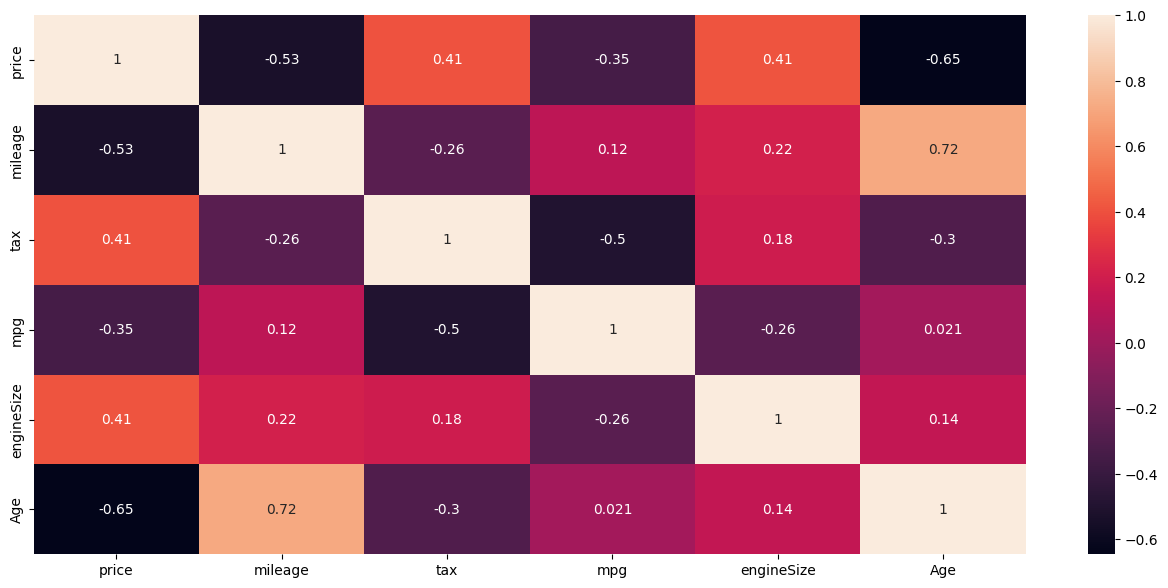

In [ ]:
#Verificar as correlações dos dados pelo mapa de calor
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# Separar as variáveis independentes (X) e a variável dependente (Y)
X_cars = df_encoded.drop('price', axis=1)  # Substitua 'price' pelo nome da coluna de destino
Y_cars = df_encoded['price']  # Substitua 'price' pelo nome da coluna de destino

#Treinamento do Modelo e Regressão Linear

In [ ]:
from sklearn.model_selection import train_test_split
X_cars_treinamento, X_cars_teste, Y_cars_treinamento, Y_cars_teste = train_test_split(X_cars, Y_cars, test_size = 0.3, random_state=0)

In [ ]:
#Verificar quantidade de dados para treinamento
X_cars_treinamento.shape, Y_cars_treinamento.shape

((12575, 35), (12575,))

In [ ]:
#Verificar quantidade de dados para teste
X_cars_teste.shape, Y_cars_teste.shape

((5390, 35), (5390,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor_multiplo_carros = LinearRegression()
regressor_multiplo_carros.fit(X_cars_treinamento, Y_cars_treinamento)

LinearRegression()

In [ ]:
# parametro bo, interceptação ou seja, o início da reta
regressor_multiplo_carros.intercept_

20039.643977315143

In [ ]:
# parametr b1, declive da linha
regressor_multiplo_carros.coef_

array([-6.18665446e-02, -1.09710549e+00, -8.27579061e+01,  2.82049695e+03,
       -1.12134955e+03,  1.18844186e+03,  1.86764831e+03,  8.80524570e+03,
        1.52465792e+04,  1.34715562e+03,  3.26733765e+03,  3.67057004e+03,
        6.25660700e+03,  1.62923098e+03,  3.82783889e+03, -3.38197617e+02,
       -2.71576870e+03,  3.63561972e+03,  2.83737197e+03,  1.05888421e+04,
        8.10760121e+03,  5.23775991e+03,  6.15973024e+03,  5.07867154e+03,
        3.09617209e+03,  6.61823237e+03, -2.72848411e-12, -1.36424205e-12,
        0.00000000e+00, -5.44888682e+02, -2.28953808e+02,  1.45734210e+03,
        8.58679879e+03,  1.02693522e+03, -3.10859077e+02])

In [ ]:
len(regressor_multiplo_carros.coef_)

35

In [ ]:
# Fazer a previsão dos valores dos carros
previsoes_treinamento = regressor_multiplo_carros.predict(X_cars_treinamento)
previsoes_treinamento

array([15472.71606954,  8779.63045299, 15388.34217537, ...,
        7672.3252092 , 16455.96072397, 11489.59308074])

In [ ]:
# Comparar o valor real com o valor previsto de X
Y_cars_teste

12173    11670
2734     10000
7031     11599
3750     14899
651      19498
         ...  
10919    11799
15636    10295
11870    12699
4057     11300
16726     6250
Name: price, Length: 5390, dtype: int64

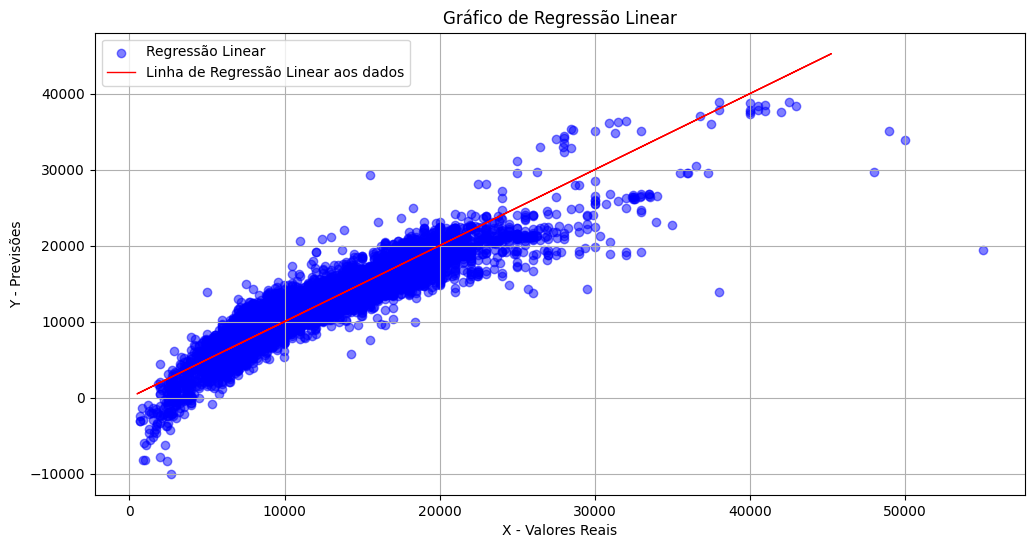

In [ ]:
# Gráfico de dispersão dos valores reais vs. previsões da regressão linear
plt.figure(figsize=(12, 6))
plt.scatter(Y_cars_treinamento, previsoes_treinamento, label='Regressão Linear', color='blue', alpha=0.5)

# Linha de regressão linear aos dados
plt.plot(Y_cars_teste, Y_cars_teste, color='red', linestyle='-', linewidth=1, label='Linha de Regressão Linear aos dados')

plt.title('Gráfico de Regressão Linear')
plt.xlabel('X - Valores Reais')
plt.ylabel('Y - Previsões')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(Y_cars_treinamento, previsoes_treinamento)
print('MSE da Regressão Linear: ', MSE)

R2 = regressor_multiplo_carros.score(X_cars_treinamento, Y_cars_treinamento)
print('R² da Regressão Linear: ', R2)

MSE da Regressão Linear:  3596607.8521220596
R² da Regressão Linear:  0.8397305371874006


# Gradiente descendente

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_cars, Y_cars, test_size=0.3, random_state=0)

In [ ]:
# Padronizar as características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo de regressão linear com Gradiente Descendente
regressor = SGDRegressor(eta0=0.001, max_iter=1000, tol=0.001, random_state=0)

In [ ]:
# Treinar o modelo
regressor.fit(X_train, y_train)

# Fazer previsões
y_pred = regressor.predict(X_test)

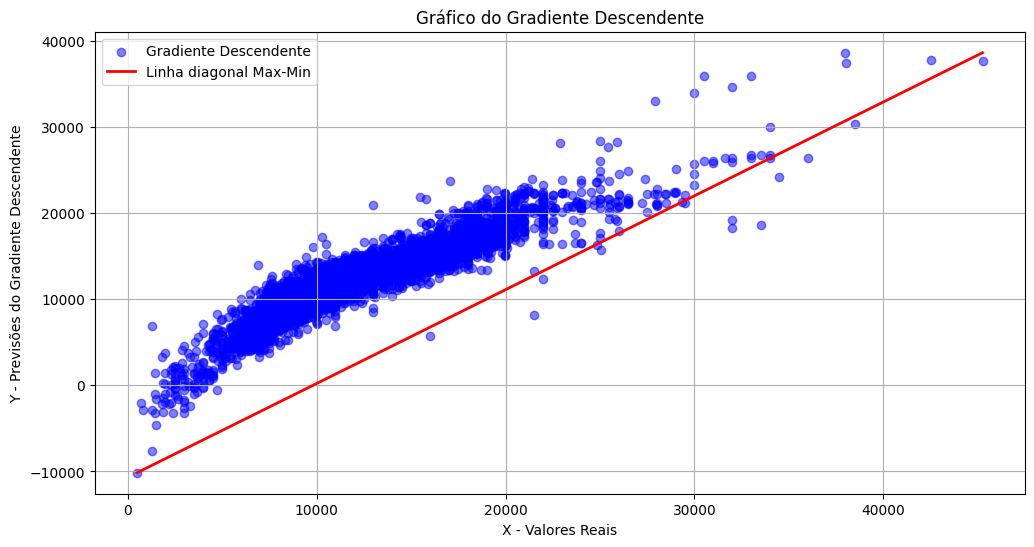

In [ ]:
# Gráfico de dispersão com os valores reais vs. previsões do gradiente descendente
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, label='Gradiente Descendente', color='blue', alpha=0.5)

# Linha de referência diagonal, max e min
plt.plot([max(y_test), min(y_test)], [max(y_pred), min(y_pred)], label = 'Linha diagonal Max-Min', color='red', linestyle='-', lw=2)

# Configurar rótulos e título
plt.title('Gráfico do Gradiente Descendente')
plt.xlabel('X - Valores Reais')
plt.ylabel('Y - Previsões do Gradiente Descendente')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# Avaliar o modelo
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE (GD)', MSE)
print('R² (GD)', r2)

MSE (GD) 3383703.476458108
R² (GD) 0.8498703442103589


# Comparação dos resultados


In [ ]:
# Avaliar o modelo
MSE = mean_squared_error(y_test, y_pred)
print('MSE (GD)', MSE)

MSE = mean_squared_error(Y_cars_treinamento, previsoes_treinamento)
print('MSE da Regressão Linear: ', MSE)

MSE (GD) 3383703.476458108
MSE da Regressão Linear:  3596607.8521220596


In [ ]:
r2 = r2_score(y_test, y_pred)
print('R² (GD)', r2)

R2 = regressor_multiplo_carros.score(X_cars_treinamento, Y_cars_treinamento)
print('R² da Regressão Linear: ', R2)

R² (GD) 0.8498703442103589
R² da Regressão Linear:  0.8397305371874006
